In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1. 다음과 같은 어레이를 Numpy를 이용하여 만드시오.

In [147]:
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [3]:
np.arange(1, 11).reshape(2,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [146]:
np.identity(n=3, dtype=np.int8)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

In [19]:
np.ones(shape=(4,4), dtype=np.int8)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int8)

In [12]:
np.arange(1,25,2).reshape(3,4)

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

2. 다음과 같은 데이터프레임을 만드시오.

In [160]:
data = {'지역': ['수도권', '경상권', '수도권', '경상권'], "2015": [9904312,3448737,2890451,2466052], "2010": [9631482,3393191,2632035,2431774], "2005": [9762546,3512547,2517680,2456016], "2000":[9853972,3655437,2466338,2473990]}

In [161]:
df = pd.DataFrame(data, index = ["서울", "부산", "인천", "대구"])
df

,지역,2015,2010,2005,2000
서울,수도권,9904312,9631482,9762546,9853972
부산,경상권,3448737,3393191,3512547,3655437
인천,수도권,2890451,2632035,2517680,2466338
대구,경상권,2466052,2431774,2456016,2473990


In [163]:
df['2010-2015 증가율'] = (df['2015']-df['2010'])/df['2010']
df.round(4)

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0164
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


3. 타이타닉호 승객에 대해서 다음을 구하시오.

In [44]:
titanic = sns.load_dataset("titanic")
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [38]:
titanic.groupby('sex').size()

sex
female    314
male      577
dtype: int64

In [39]:
titanic.groupby('class').size()

class
First     216
Second    184
Third     491
dtype: int64

In [40]:
titanic.groupby('alive').size()

alive
no     549
yes    342
dtype: int64

In [50]:
bins = [1,15,30,45,60,99]
labels = ["미성년자", '청년', '중년', '장년', '노년']

ages = pd.cut(titanic.age, bins, labels=labels)
df_ages = pd.DataFrame(ages.value_counts(), index=labels)
df_ages

,age
미성년자,69
청년,326
중년,202
장년,81
노년,22


In [52]:
df_ages["비율"] = df_ages["age"]/df_ages['age'].sum()*100
df_ages

,age,비율
미성년자,69,9.857143
청년,326,46.571429
중년,202,28.857143
장년,81,11.571429
노년,22,3.142857


4. 팁 데이터에 대해서 다음을 구하시오

In [55]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
tips['tip_pct'] = tips['tip']/tips['total_bill']*100
tips.round(2)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85


In [65]:
tips.pivot_table("tip_pct", index= ["day"])

,tip_pct
day,
Thur,16.127563
Fri,16.991303
Sat,15.315172
Sun,16.689729


5. 다음의 지시대로 SQLite3를 이용하는 파이썬 프로그램을 작성하시오

In [173]:
import sqlite3

In [176]:
conn = sqlite3.connect('./TESTING.db')
cur = conn.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS Eagles (back_no INT NOT NULL, name TEXT, position TEXT, PRIMARY KEY(back_no));')

In [180]:
cur = conn.cursor()
cur.execute("INSERT INTO Eagles VALUES (8, '정근우', '내야수'), (30,'제라드호잉','외야수'), (13,'최재훈','포수'), (57,'정우람','투수'), (66,'유장혁','외야수');")

In [181]:
conn.commit()

In [182]:
cur.execute('SELECT * FROM Eagles')
for row in cur:
    print(row)

(8, '정근우', '내야수')
(30, '제라드호잉', '외야수')
(13, '최재훈', '포수')
(57, '정우람', '투수')
(66, '유장혁', '외야수')


In [185]:
cur = conn.cursor()

cur.execute("UPDATE Eagles SET position = '외야수' WHERE name = '정근우';")

conn.commit()

In [186]:
cur.execute('SELECT * FROM Eagles')
for row in cur:
    print(row)

(8, '정근우', '외야수')
(30, '제라드호잉', '외야수')
(13, '최재훈', '포수')
(57, '정우람', '투수')
(66, '유장혁', '외야수')


In [192]:
cur = conn.cursor()
cur.execute('DELETE FROM Eagles WHERE back_no=(SELECT MAX(back_no) FROM Eagles);')
conn.commit()

In [193]:
cur.execute('SELECT * FROM Eagles')
for row in cur:
    print(row)

(8, '정근우', '외야수')
(30, '제라드호잉', '외야수')
(13, '최재훈', '포수')
(57, '정우람', '투수')


In [194]:
conn.close()

6. 시그모이드 함수와 시그모이드 함수를 미분한 함수의 그래프를 그리시오.

In [136]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [137]:
X = np.linspace(-3, 3, endpoint=True)

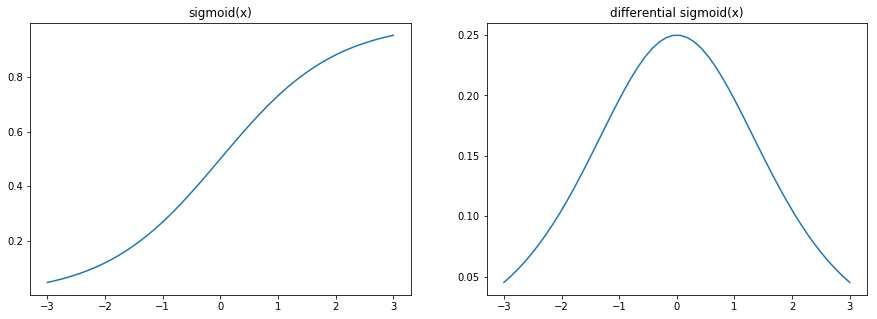

In [142]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(X, sigmoid(X))
plt.title("sigmoid(x)")

plt.subplot(122)
plt.plot(X, sigmoid(X)*(1-sigmoid(X)))
plt.title("differential sigmoid(x)")

plt.show()

8. 아이리스 데이터 셋을 이용하여 다음을 구하는 프로그램을 작성하시오.

In [165]:
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


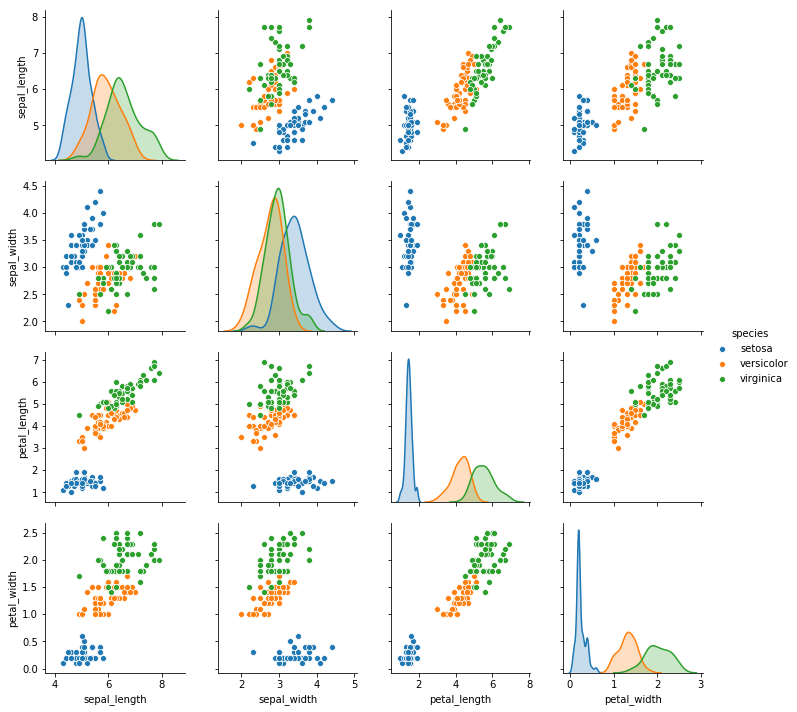

In [166]:
sns.pairplot(iris, hue = 'species')

In [167]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelEncoder

In [168]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

In [169]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

dataset = iris.values
X = dataset[:, 0:4]
Y_obj = dataset[:, 4]

In [170]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

Y_encoded = np_utils.to_categorical(Y)
Y_encoded[0]

array([1., 0., 0.], dtype=float32)

In [171]:
model = Sequential()
model.add(Dense(30, input_dim = 4, activation="relu"))
model.add(Dense(3, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

model.fit(X, Y_encoded, epochs = 500, batch_size = 5, verbose = 2, callbacks = [early_stopping_callback])

Epoch 1/500
 - 0s - loss: 1.3902 - acc: 0.4000
Epoch 2/500
 - 0s - loss: 1.1483 - acc: 0.5267
Epoch 3/500
 - 0s - loss: 0.9831 - acc: 0.5067
Epoch 4/500
 - 0s - loss: 0.8764 - acc: 0.4600
Epoch 5/500
 - 0s - loss: 0.8048 - acc: 0.7467
Epoch 6/500
 - 0s - loss: 0.7348 - acc: 0.7733
Epoch 7/500
 - 0s - loss: 0.6758 - acc: 0.7800
Epoch 8/500
 - 0s - loss: 0.6276 - acc: 0.8667
Epoch 9/500
 - 0s - loss: 0.5824 - acc: 0.8267
Epoch 10/500
 - 0s - loss: 0.5461 - acc: 0.8467
Epoch 11/500
 - 0s - loss: 0.5061 - acc: 0.8667
Epoch 12/500
 - 0s - loss: 0.4790 - acc: 0.9267
Epoch 13/500
 - 0s - loss: 0.4525 - acc: 0.9333
Epoch 14/500
 - 0s - loss: 0.4329 - acc: 0.8933
Epoch 15/500
 - 0s - loss: 0.4215 - acc: 0.9000
Epoch 16/500
 - 0s - loss: 0.3984 - acc: 0.9733
Epoch 17/500
 - 0s - loss: 0.3814 - acc: 0.9067
Epoch 18/500
 - 0s - loss: 0.3637 - acc: 0.9533
Epoch 19/500
 - 0s - loss: 0.3534 - acc: 0.9533
Epoch 20/500
 - 0s - loss: 0.3433 - acc: 0.9467
Epoch 21/500
 - 0s - loss: 0.3285 - acc: 0.9600
E

Epoch 171/500
 - 0s - loss: 0.0740 - acc: 0.9867
Epoch 172/500
 - 0s - loss: 0.0667 - acc: 0.9800
Epoch 173/500
 - 0s - loss: 0.0801 - acc: 0.9733
Epoch 174/500
 - 0s - loss: 0.0709 - acc: 0.9800
Epoch 175/500
 - 0s - loss: 0.0722 - acc: 0.9667
Epoch 176/500
 - 0s - loss: 0.0648 - acc: 0.9800
Epoch 177/500
 - 0s - loss: 0.0750 - acc: 0.9733
Epoch 178/500
 - 0s - loss: 0.0688 - acc: 0.9733
Epoch 179/500
 - 0s - loss: 0.0694 - acc: 0.9800
Epoch 180/500
 - 0s - loss: 0.0707 - acc: 0.9800
Epoch 181/500
 - 0s - loss: 0.0685 - acc: 0.9733
Epoch 182/500
 - 0s - loss: 0.0696 - acc: 0.9667
Epoch 183/500
 - 0s - loss: 0.0679 - acc: 0.9800
Epoch 184/500
 - 0s - loss: 0.0690 - acc: 0.9800
Epoch 185/500
 - 0s - loss: 0.0689 - acc: 0.9733
Epoch 186/500
 - 0s - loss: 0.0674 - acc: 0.9800
Epoch 187/500
 - 0s - loss: 0.0683 - acc: 0.9733
Epoch 188/500
 - 0s - loss: 0.0700 - acc: 0.9867
Epoch 189/500
 - 0s - loss: 0.0699 - acc: 0.9800
Epoch 190/500
 - 0s - loss: 0.0643 - acc: 0.9800
Epoch 191/500
 - 0s 

Epoch 339/500
 - 0s - loss: 0.0612 - acc: 0.9800
Epoch 340/500
 - 0s - loss: 0.0605 - acc: 0.9800
Epoch 341/500
 - 0s - loss: 0.0544 - acc: 0.9800
Epoch 342/500
 - 0s - loss: 0.0592 - acc: 0.9667
Epoch 343/500
 - 0s - loss: 0.0742 - acc: 0.9600
Epoch 344/500
 - 0s - loss: 0.0586 - acc: 0.9867
Epoch 345/500
 - 0s - loss: 0.0580 - acc: 0.9867
Epoch 346/500
 - 0s - loss: 0.0555 - acc: 0.9800
Epoch 347/500
 - 0s - loss: 0.0556 - acc: 0.9733
Epoch 348/500
 - 0s - loss: 0.0549 - acc: 0.9800
Epoch 349/500
 - 0s - loss: 0.0553 - acc: 0.9800
Epoch 350/500
 - 0s - loss: 0.0556 - acc: 0.9733
Epoch 351/500
 - 0s - loss: 0.0574 - acc: 0.9733
Epoch 352/500
 - 0s - loss: 0.0556 - acc: 0.9800
Epoch 353/500
 - 0s - loss: 0.0629 - acc: 0.9733
Epoch 354/500
 - 0s - loss: 0.0596 - acc: 0.9733
Epoch 355/500
 - 0s - loss: 0.0593 - acc: 0.9800
Epoch 356/500
 - 0s - loss: 0.0553 - acc: 0.9800
Epoch 357/500
 - 0s - loss: 0.0631 - acc: 0.9800
Epoch 358/500
 - 0s - loss: 0.0545 - acc: 0.9800
Epoch 359/500
 - 0s 

In [172]:
print(" \n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

150/150 [==============================] - 0s 739us/step
 
 Accuracy: 0.9867


In [100]:
del model

9. 피마 인디언 데이터 셋을 이용하여 다음을 구하는 프로그램을 작성하시오.

In [93]:
df = pd.read_csv("DL/dataset/pima-indians-diabetes.csv", names =  ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


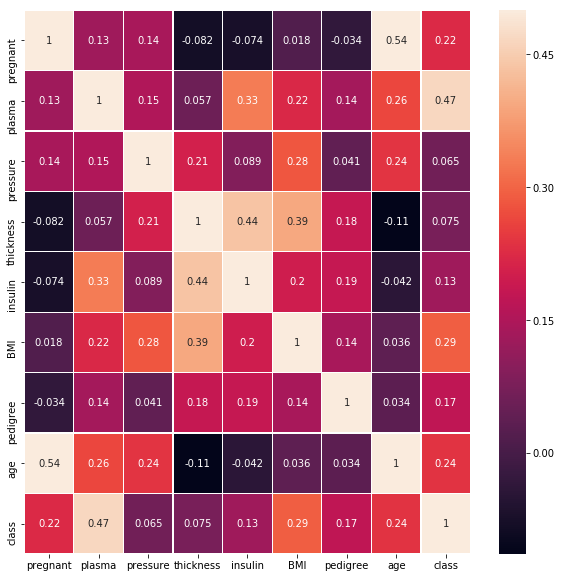

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, annot=True)

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [125]:
dataset= df.values
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = seed)

In [127]:
model = Sequential()
model.add(Dense(30, input_dim = 8, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 500, batch_size =10, verbose = 2, callbacks = [early_stopping_callback])

Epoch 1/500
 - 0s - loss: 2.2657 - acc: 0.5278
Epoch 2/500
 - 0s - loss: 1.2597 - acc: 0.5642
Epoch 3/500
 - 0s - loss: 0.8991 - acc: 0.6302
Epoch 4/500
 - 0s - loss: 0.7708 - acc: 0.6337
Epoch 5/500
 - 0s - loss: 0.7269 - acc: 0.6354
Epoch 6/500
 - 0s - loss: 0.7090 - acc: 0.6337
Epoch 7/500
 - 0s - loss: 0.6251 - acc: 0.6840
Epoch 8/500
 - 0s - loss: 0.6369 - acc: 0.6892
Epoch 9/500
 - 0s - loss: 0.6513 - acc: 0.6771
Epoch 10/500
 - 0s - loss: 0.6714 - acc: 0.6632
Epoch 11/500
 - 0s - loss: 0.6147 - acc: 0.6771
Epoch 12/500
 - 0s - loss: 0.5989 - acc: 0.7049
Epoch 13/500
 - 0s - loss: 0.5757 - acc: 0.7205
Epoch 14/500
 - 0s - loss: 0.5879 - acc: 0.6962
Epoch 15/500
 - 0s - loss: 0.5882 - acc: 0.7170
Epoch 16/500
 - 0s - loss: 0.6294 - acc: 0.6840
Epoch 17/500
 - 0s - loss: 0.5742 - acc: 0.7049
Epoch 18/500
 - 0s - loss: 0.6067 - acc: 0.6840
Epoch 19/500
 - 0s - loss: 0.5884 - acc: 0.7083
Epoch 20/500
 - 0s - loss: 0.5758 - acc: 0.7031
Epoch 21/500
 - 0s - loss: 0.6569 - acc: 0.6701
E

Epoch 171/500
 - 0s - loss: 0.4446 - acc: 0.7934
Epoch 172/500
 - 0s - loss: 0.4585 - acc: 0.7795
Epoch 173/500
 - 0s - loss: 0.4589 - acc: 0.7743
Epoch 174/500
 - 0s - loss: 0.4544 - acc: 0.7986
Epoch 175/500
 - 0s - loss: 0.4530 - acc: 0.7934
Epoch 176/500
 - 0s - loss: 0.4646 - acc: 0.7847
Epoch 177/500
 - 0s - loss: 0.4549 - acc: 0.7917
Epoch 178/500
 - 0s - loss: 0.4409 - acc: 0.7951
Epoch 179/500
 - 0s - loss: 0.4464 - acc: 0.7778
Epoch 180/500
 - 0s - loss: 0.4577 - acc: 0.7726
Epoch 181/500
 - 0s - loss: 0.4478 - acc: 0.8073
Epoch 182/500
 - 0s - loss: 0.4501 - acc: 0.7830
Epoch 183/500
 - 0s - loss: 0.4566 - acc: 0.7708
Epoch 184/500
 - 0s - loss: 0.4641 - acc: 0.7795
Epoch 185/500
 - 0s - loss: 0.4465 - acc: 0.7899
Epoch 186/500
 - 0s - loss: 0.4396 - acc: 0.7865
Epoch 187/500
 - 0s - loss: 0.4608 - acc: 0.7847
Epoch 188/500
 - 0s - loss: 0.4442 - acc: 0.7865
Epoch 189/500
 - 0s - loss: 0.4607 - acc: 0.7882
Epoch 190/500
 - 0s - loss: 0.4578 - acc: 0.7917
Epoch 191/500
 - 0s 

 - 0s - loss: 0.3680 - acc: 0.8229
Epoch 339/500
 - 0s - loss: 0.3744 - acc: 0.8177
Epoch 340/500
 - 0s - loss: 0.3583 - acc: 0.8281
Epoch 341/500
 - 0s - loss: 0.4062 - acc: 0.8021
Epoch 342/500
 - 0s - loss: 0.3696 - acc: 0.8437
Epoch 343/500
 - 0s - loss: 0.3812 - acc: 0.8229
Epoch 344/500
 - 0s - loss: 0.3639 - acc: 0.8229
Epoch 345/500
 - 0s - loss: 0.3605 - acc: 0.8368
Epoch 346/500
 - 0s - loss: 0.3878 - acc: 0.8160
Epoch 347/500
 - 0s - loss: 0.3713 - acc: 0.8229
Epoch 348/500
 - 0s - loss: 0.3721 - acc: 0.8247
Epoch 349/500
 - 0s - loss: 0.3693 - acc: 0.8247
Epoch 350/500
 - 0s - loss: 0.3860 - acc: 0.8021
Epoch 351/500
 - 0s - loss: 0.3780 - acc: 0.8229
Epoch 352/500
 - 0s - loss: 0.3791 - acc: 0.8038
Epoch 353/500
 - 0s - loss: 0.3691 - acc: 0.8194
Epoch 354/500
 - 0s - loss: 0.3574 - acc: 0.8281
Epoch 355/500
 - 0s - loss: 0.3530 - acc: 0.8490
Epoch 356/500
 - 0s - loss: 0.3602 - acc: 0.8247
Epoch 357/500
 - 0s - loss: 0.3695 - acc: 0.8281
Epoch 358/500
 - 0s - loss: 0.3586

In [128]:
print("\n Accuracy: %.4f" % (model.evaluate(X_train, Y_train)[1]))
print('\n\n')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

576/576 [==============================] - 0s 189us/step

 Accuracy: 0.8646



192/192 [==============================] - 0s 21us/step

 Accuracy: 0.7552
